In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

### Read the data as an appropriate Time Series data and plot the data.

In [2]:
df = pd.read_csv('Sparkling.csv')
df1 = df.copy
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [3]:
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [4]:
dt = pd.date_range(start = '1/1/1980', end = '08/1/1995', freq  = 'M')
df['Time'] = pd.DataFrame(dt)

In [5]:
df.drop('YearMonth', axis = 1, inplace = True)
df.set_index('Time', drop = True, inplace = True)

In [6]:
df.head()

,Sparkling
Time,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


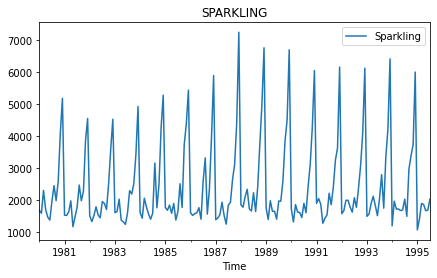

In [7]:
# Plotting the data
df.plot(figsize = (7,4));
plt.title('SPARKLING');

## Q2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [9]:
df.isnull().sum()

Sparkling    0
dtype: int64

In [10]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


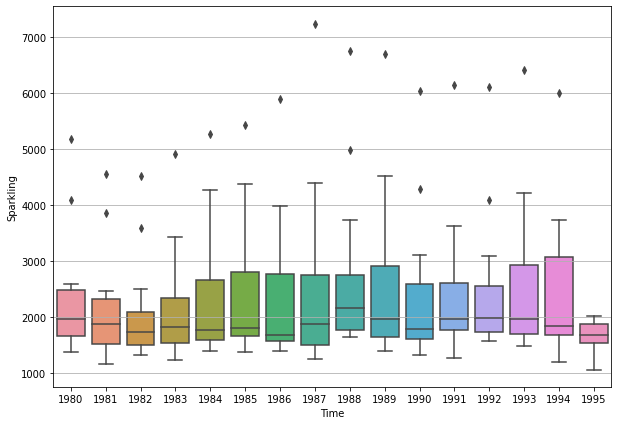

In [11]:
# Yearly plot
plt.figure(figsize = (10,7));
plt.grid(True)
sns.boxplot(x = df.index.year, y = df.Sparkling);

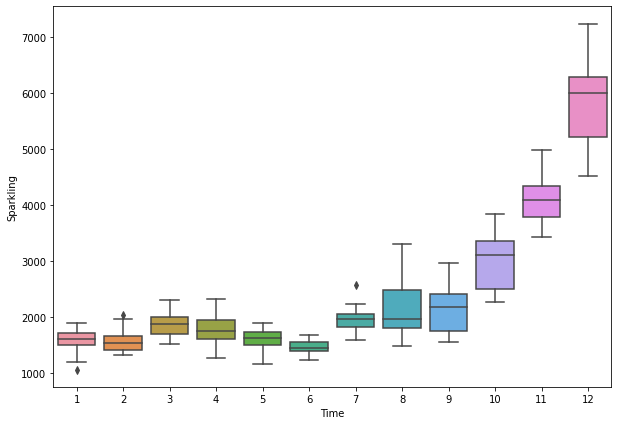

In [12]:
# Monthly PLot
plt.figure(figsize = (10,7))
sns.boxplot(x = df.index.month, y = df.Sparkling);

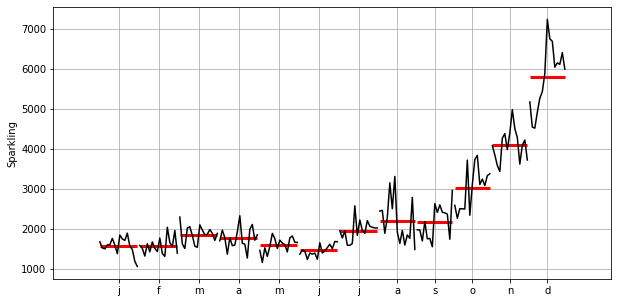

In [15]:
## Month Plot
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(10,5))
month_plot(df, ylabel='Sparkling', ax=ax)
plt.grid()

In [14]:
## Year sales across month
yearly_sales_across_months = pd.pivot_table(df, values='Sparkling', columns=df.index.month, index=df.index.year)
yearly_sales_across_months

Time,1,2,3,4,5,6,7,8,9,10,11,12
Time,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


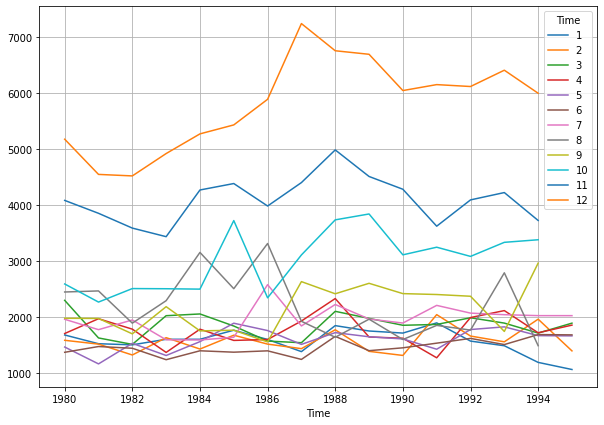

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

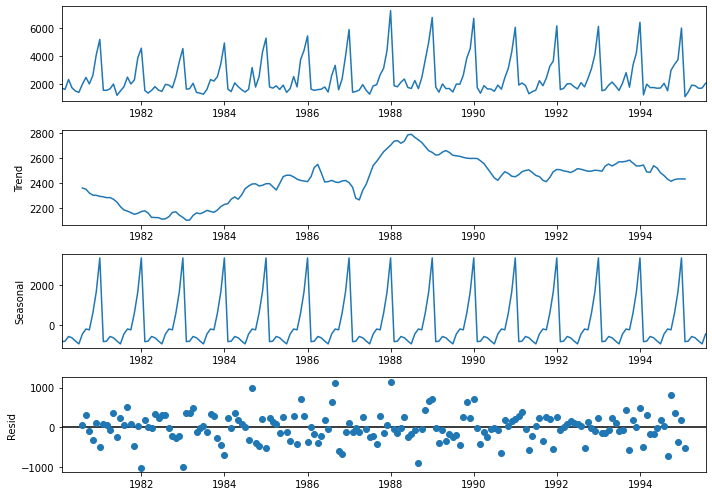

In [18]:
## Additive decomposition
decomposition_add = seasonal_decompose(df, model='additive')
decomposition_add.plot();

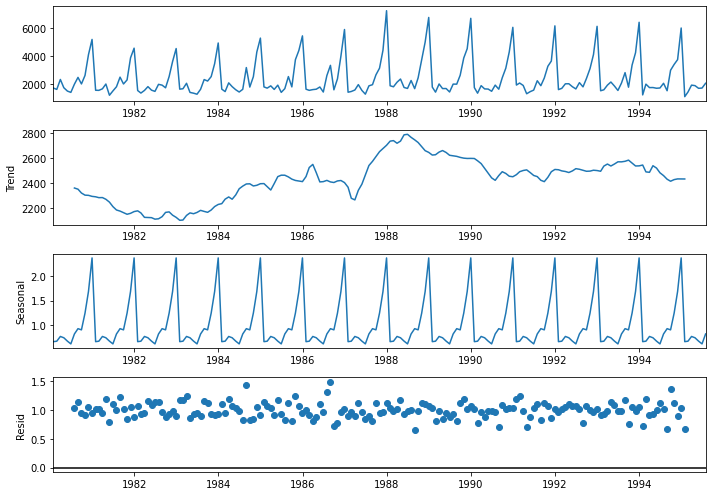

In [19]:
## Multiplicative Decomposition
decomposition_mul = seasonal_decompose(df, model='multiplicative')
decomposition_mul.plot();

## Q3 Split the data into training and test. The test data should start in 1991.

In [20]:
train = df[df.index.year<1991]

In [21]:
test = df[df.index.year>=1991]

## Q4 Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.

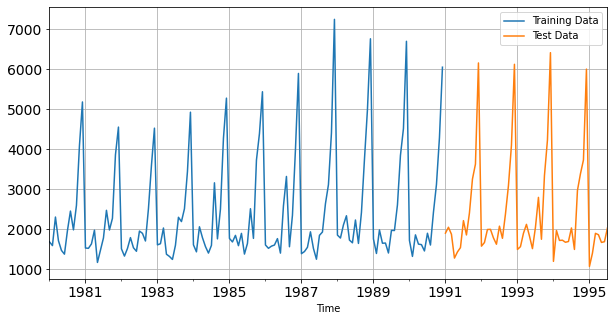

In [22]:
train['Sparkling'].plot(figsize=(10,5), fontsize=14)
test['Sparkling'].plot(figsize=(10,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

#### Models Built: -
1. Linear Regression
2. Naive Approach
3. Simple Average
5. Suitable Exponential Smoothing

#### 1. Linear Regression

In [23]:
## Linear Regression
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [24]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [25]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [26]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time                       
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time                       
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time                       
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time                       
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

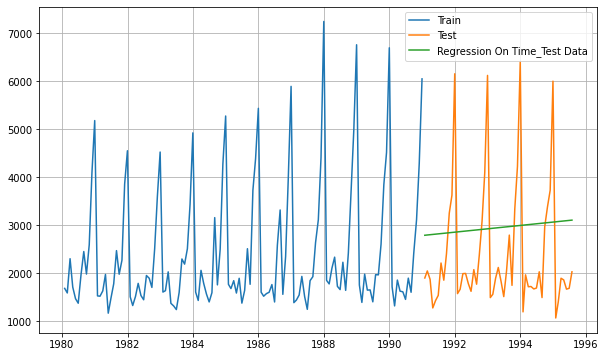

In [33]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(10,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [34]:
## Accuracy Metrics
from sklearn import metrics

## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [35]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175


#### 2. Naive Approach

In [36]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [37]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

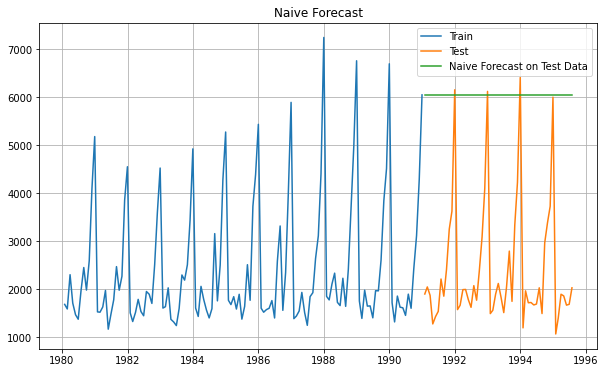

In [38]:
plt.figure(figsize=(10,6))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [39]:
## Accuracy
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [40]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


#### 3. Simple Average

In [41]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [42]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


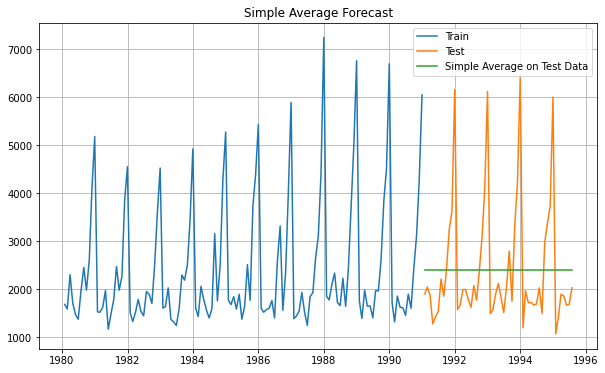

In [44]:
plt.figure(figsize=(10,6))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [45]:
## Accuracy Metrics
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [46]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


#### Exponential Smoothing

In [47]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

<AxesSubplot:xlabel='Time'>

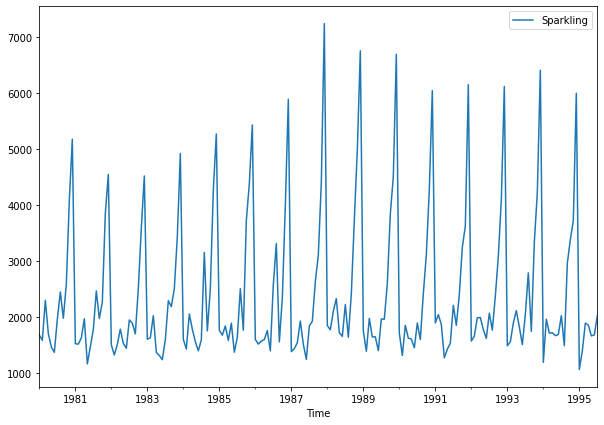

In [48]:
df.plot()

- Data has seasonality: Hence moving with Holt winter

In [49]:
TES_train = train.copy()
TES_test = test.copy()

In [50]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [51]:
model_TES_autofit = model_TES.fit()

In [52]:
model_TES_autofit.params

{'smoothing_level': 0.15420626100710186,
 'smoothing_slope': 5.31004588730174e-21,
 'smoothing_seasonal': 0.3713228125445634,
 'damping_slope': nan,
 'initial_level': 1639.99933972618,
 'initial_slope': 4.847695527861546,
 'initial_seasons': array([1.00842978, 0.96899514, 1.24181168, 1.13206716, 0.93979295,
        0.93811177, 1.22457951, 1.54428109, 1.27335495, 1.631977  ,
        2.48292059, 3.11861503]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [53]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
Time,,
1991-01-31,1902,1602.194523
1991-02-28,2049,1373.889119
1991-03-31,1874,1807.439476
1991-04-30,1279,1704.573982
1991-05-31,1432,1602.374672


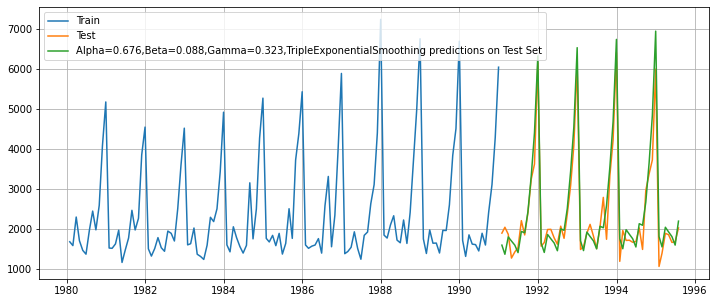

In [54]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(12,5))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [55]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 383.158


In [56]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",383.157627


## Q5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [57]:
from statsmodels.tsa.stattools import adfuller

In [58]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932417
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.
Let us take one level of differencing to see whether the series becomes stationary.

In [59]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


Now, let us go ahead and plot the stationary series.

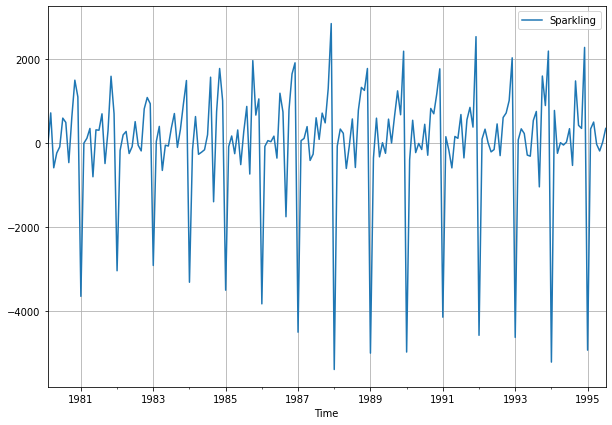

In [60]:
df.diff().dropna().plot(grid=True);

## Q6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [61]:
# Lets have a kook at the ACF and PACF plots to get an idea about the range of p and q values
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

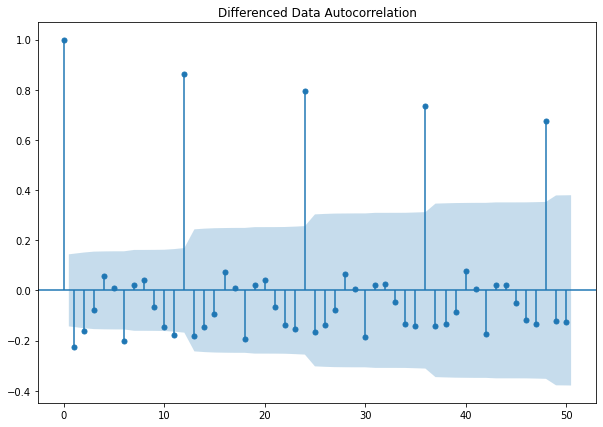

In [62]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

q = 2

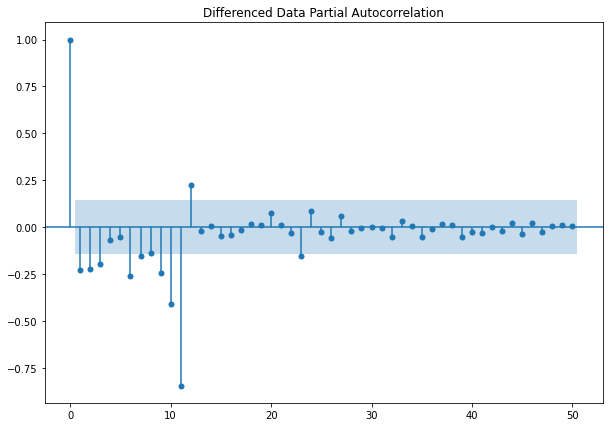

In [64]:
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation',zero = True, method = 'ywmle')
plt.show()

p = 3

#### Checking stationary on the train data

<AxesSubplot:xlabel='Time'>

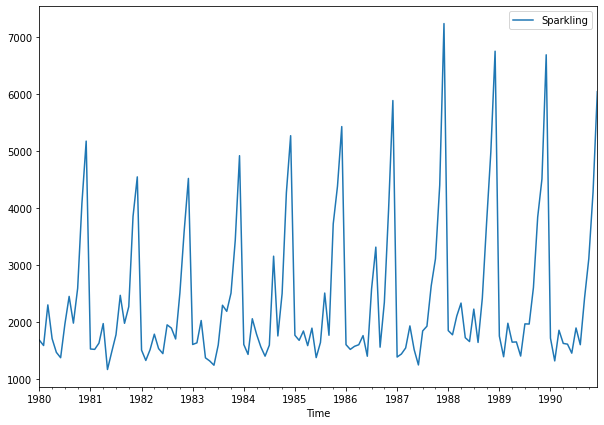

In [65]:
train.plot()

In [66]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593658
Number of lags used 12


Training data not stationary

In [67]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655515133e-11
Number of lags used 11


Training data stationarity at 1st differencing

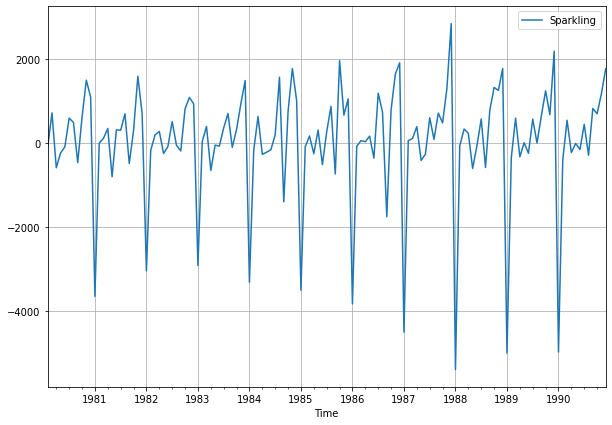

In [68]:
train.diff().dropna().plot(grid=True);

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


#### Building automated ARIMA Model

In [70]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [71]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [72]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591794
ARIMA(0, 1, 2) - AIC:2234.408323134422
ARIMA(0, 1, 3) - AIC:2233.994857744794
ARIMA(1, 1, 0) - AIC:2266.608539319009
ARIMA(1, 1, 1) - AIC:2235.7550946665842
ARIMA(1, 1, 2) - AIC:2234.5272004524795
ARIMA(1, 1, 3) - AIC:2235.6078127937453
ARIMA(2, 1, 0) - AIC:2260.3657439680865
ARIMA(2, 1, 1) - AIC:2233.777626314003
ARIMA(2, 1, 2) - AIC:2213.509212359953


C:\Users\adity\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3) - AIC:2232.960945161044
ARIMA(3, 1, 0) - AIC:2257.723378997941
ARIMA(3, 1, 1) - AIC:2235.4991618116906


C:\Users\adity\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2) - AIC:2230.775697545291
ARIMA(3, 1, 3) - AIC:2221.455906419757


C:\Users\adity\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [73]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2213.509212
15,"(3, 1, 3)",2221.455906
14,"(3, 1, 2)",2230.775698
11,"(2, 1, 3)",2232.960945
9,"(2, 1, 1)",2233.777626


In [74]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Thu, 22 Apr 2021   AIC                           2213.509
Time:                        19:56:58   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

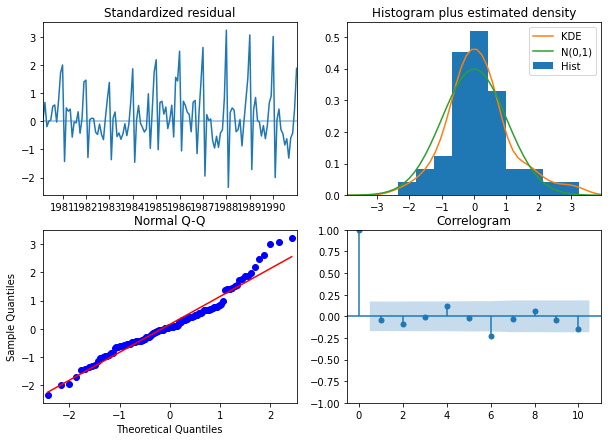

In [75]:
results_auto_ARIMA.plot_diagnostics();

#### Prediction on Test Set

In [76]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [77]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [78]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9794022525355 
MAPE: 47.09987123888168


In [79]:
resultsDf_ = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf_

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979402,47.099871


#### Building SARIMA based on AIC

In [80]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [81]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [82]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716293
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536890567
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.7845154973388
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844434373
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360123573417
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.3929095050637


C:\Users\adity\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.199361751041
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805659735
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.5376425549398
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.7622668155266
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.6879953816776
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.448985803045
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.0138759388246
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505857
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908282
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339545634
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:1826.528528465194
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428781894
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298132763
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.709327681411
SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:1737.6243229595664
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885103999192
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933170532
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AI

SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:2068.778094969002
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1889.787540454726
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1797.072641842399
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:2074.110221747104
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1955.6058967635336
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1826.035208118571
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1714.4016876189432
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1763.276649582496
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1760.826755616304
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1729.1925802058981
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:1647.4159002128135
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:1676.126656003717
SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:1672.2101110109088
SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:1661.9920141785487
SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:1649.2144997503233
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:2171.0395882782
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:2060.2433990003756
SARIMA(2, 1, 3)x(0, 0, 2, 6) - AIC:1853.2246186499885
SARIMA(2, 1, 3)x(0, 0, 3, 6) - AIC:1783

In [83]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",1629.282423
251,"(3, 1, 3)","(2, 0, 3, 6)",1631.005091
59,"(0, 1, 3)","(2, 0, 3, 6)",1633.327872
123,"(1, 1, 3)","(2, 0, 3, 6)",1633.965380
63,"(0, 1, 3)","(3, 0, 3, 6)",1635.101039


In [84]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -803.641
Date:                           Thu, 22 Apr 2021   AIC                           1629.282
Time:                                   20:54:50   BIC                           1658.887
Sample:                               01-31-1980   HQIC                          1641.288
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7438      0.089    -19.547      0.000      -1.919      -1.569
ar.L2         -0.7859      0.085     -9.229

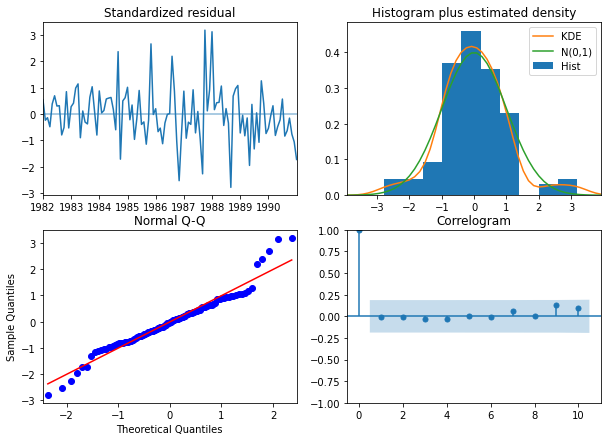

In [85]:
results_auto_SARIMA.plot_diagnostics();

In [86]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [87]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,1353.451128,366.828087,634.481290,2072.420966
1991-02-28,977.693295,385.338903,222.442922,1732.943668
1991-03-31,1659.214067,385.590671,903.470240,2414.957894
1991-04-30,1569.708213,396.373237,792.830945,2346.585482
1991-05-31,1167.677304,396.525335,390.501928,1944.852679


In [88]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 838.9413285550575 
MAPE: 36.86749244464664


In [89]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(2,1,3)(2,0,3,6)'])


resultsDf_ = pd.concat([resultsDf_,temp_resultsDf])

resultsDf_

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979402,47.099871
"SARIMA(2,1,3)(2,0,3,6)",838.941329,36.867492


## Q7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Manual ARIMA

<AxesSubplot:xlabel='Time'>

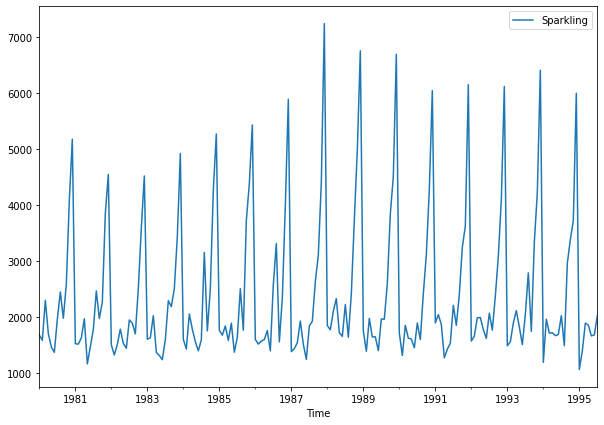

In [90]:
df.plot()

In [91]:
# Checking for stationarity
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932417
Number of lags used 12


* The data is not stationary
* Need to use differencing


<AxesSubplot:xlabel='Time'>

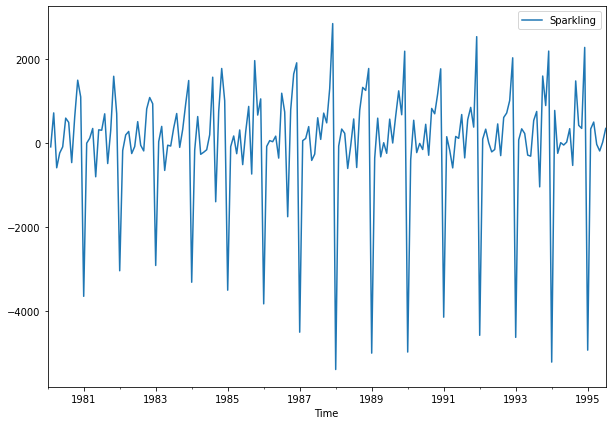

In [92]:
df.diff().plot()

In [93]:
dftest = adfuller(df.diff(1).dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


The data is stationary now

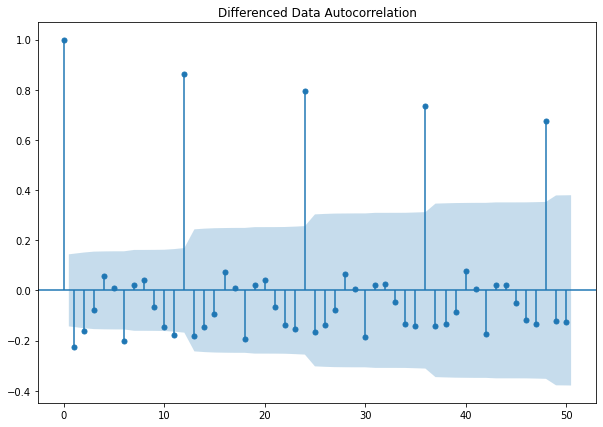

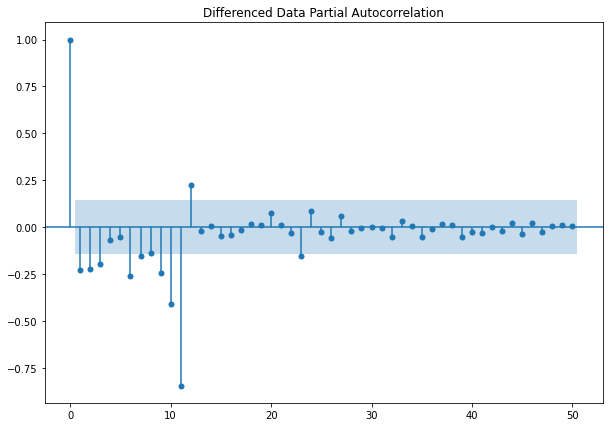

In [94]:
# Plotting the ACF plot to determine q
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation',method= 'ywmle')
plt.show()

From the above two plots: -
* q = 2
* p = 3

In [112]:
# The manual model : (p,d,q):(3,1,2)
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.388
Date:                Thu, 22 Apr 2021   AIC                           2230.776
Time:                        21:56:03   BIC                           2248.027
Sample:                    01-31-1980   HQIC                          2237.786
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4286      0.047     -9.053      0.000      -0.521      -0.336
ar.L2          0.3357      0.106      3.163      0.002       0.128       0.544
ar.L3         -0.2357      0.059     -4.006      0.0

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


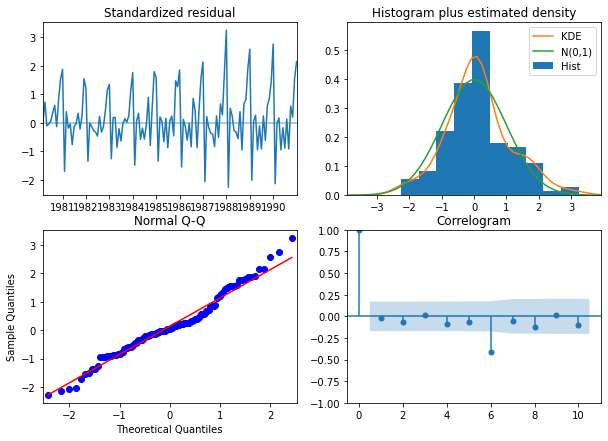

In [96]:
results_manual_ARIMA.plot_diagnostics();

In [97]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [98]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1280.666115199149 
MAPE: 43.39903225371241


In [99]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,2)'])


resultsDf_ = pd.concat([resultsDf_,temp_resultsDf])

resultsDf_

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979402,47.099871
"SARIMA(2,1,3)(2,0,3,6)",838.941329,36.867492
"ARIMA(3,1,2)",1280.666115,43.399032


#### Manual SARIMA

In [100]:
# Checking Stationarity
dftest = adfuller(df.diff(6).dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -11.364
DF test p-value is 4.720421360314017e-18
Number of lags used 6


We can clearly see, the data is stationarity for Seasonality = 6, hence D = 0

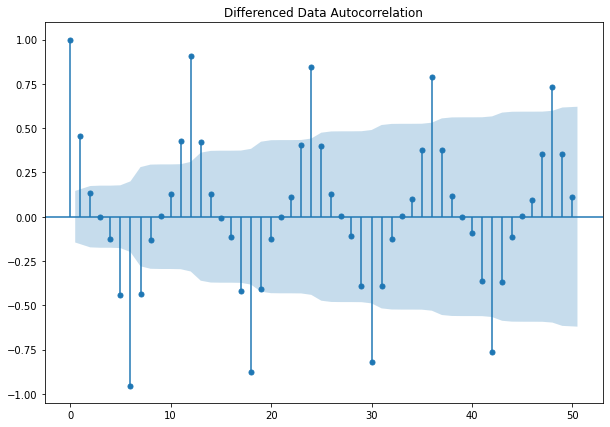

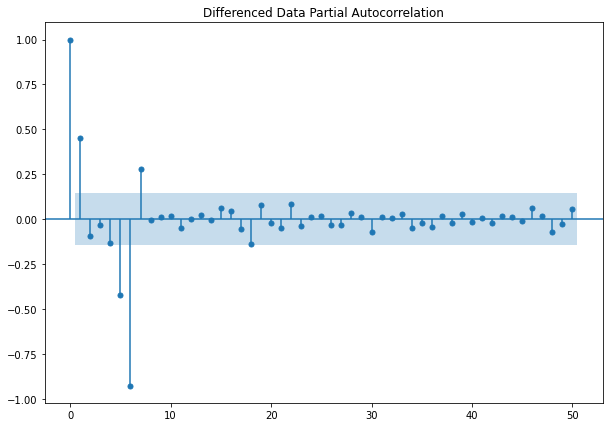

In [101]:
plot_acf(df['Sparkling'].diff(6).dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff(6).dropna(),lags=50,title='Differenced Data Partial Autocorrelation',method = 'ywmle')
plt.show()

From above two plots: -
* P = 2
* Q = 1

Finally we have: -
* p = 3
* d = 1
* q = 2
* P = 2
* D = 0
* Q = 1
* S = 6

In [117]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(2, 0, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 6)   Log Likelihood                -872.413
Date:                             Thu, 22 Apr 2021   AIC                           1760.827
Time:                                     22:03:10   BIC                           1782.924
Sample:                                 01-31-1980   HQIC                          1769.798
                                      - 12-31-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5704      0.166     -3.440      0.001      -0.895      -0.245
ar.L2          0.0875      

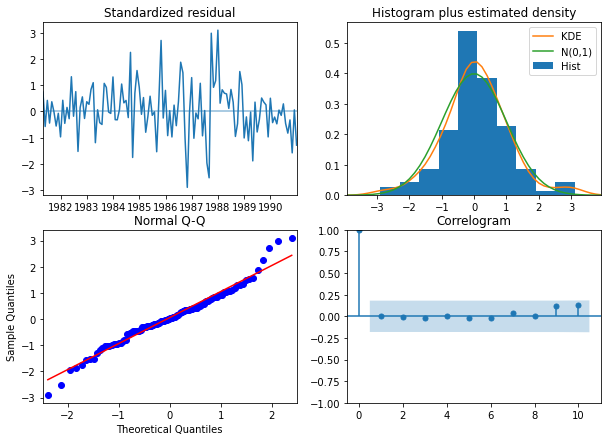

In [118]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [119]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [120]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 335.2168276264622 
MAPE: 12.323204833214419


In [106]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(2,1,2)(2,0,1,6)'])


resultsDf_ = pd.concat([resultsDf_,temp_resultsDf])

resultsDf_

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979402,47.099871
"SARIMA(2,1,3)(2,0,3,6)",838.941329,36.867492
"ARIMA(3,1,2)",1280.666115,43.399032
"SARIMA(2,1,2)(2,0,1,6)",335.216828,12.323205


## Q9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [107]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                         SARIMAX Results                                         
Dep. Variable:                                 Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 0, [1, 2, 3], 6)   Log Likelihood               -1215.503
Date:                                   Thu, 22 Apr 2021   AIC                           2451.006
Time:                                           21:41:40   BIC                           2482.066
Sample:                                       01-31-1980   HQIC                          2463.614
                                            - 07-31-1995                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6904      0.272     -2.534      0.011    

In [108]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [109]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1841.969064,374.423439,1108.112610,2575.825519
1995-09-30,2390.843369,379.899947,1646.253155,3135.433582
1995-10-31,3279.642994,379.897437,2535.057700,4024.228288
1995-11-30,4023.195276,382.108132,3274.277099,4772.113452
1995-12-31,6288.028043,382.285091,5538.763033,7037.293054


In [110]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 546.6256169012926


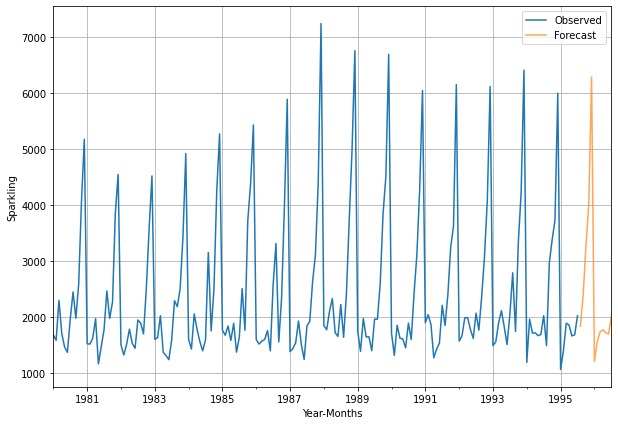

In [111]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();